# In the following is the influence of the mesh refinement examined and its affects to the convergence 

### The simulation was run with five meshes of different refinement levels. They will be refered to as 1 to 5. 1 being the least and 5 the most refined.


lets say here is something written 

#### Residuals 

### Direct comparison of each field variable

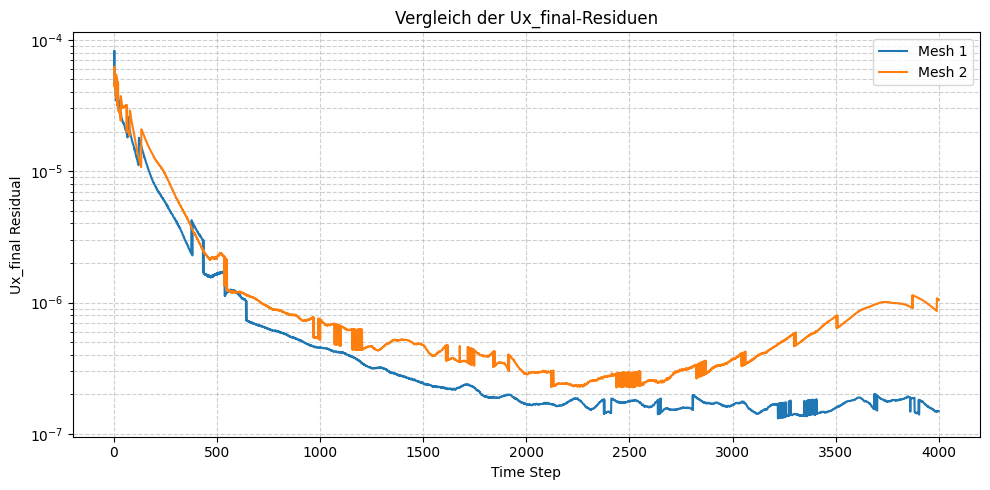

In [1]:
import matplotlib.pyplot as plt

def parse_solver_info(filename):
    times = []
    ux_final = []

    with open(filename, 'r') as f:
        for line in f:
            # Überspringe Kommentare und leere Zeilen
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) < 5:
                continue

            try:
                time = float(parts[0])
                ux = float(parts[3])  # Ux_final
                times.append(time)
                ux_final.append(ux)
            except ValueError:
                continue

    return times, ux_final


# === Dateien einlesen ===
times1, ux1 = parse_solver_info('output/MeshConvergence/mesh_1/postProcessing/solverInfo/0/solverInfo.dat')
times2, ux2 = parse_solver_info('output/MeshConvergence/mesh_2/postProcessing/solverInfo/0/solverInfo.dat')

# Länge angleichen (an längeres Case)
if len(times1) > len(times2):
    times = times1
    ux2.extend([None] * (len(times1) - len(times2)))
elif len(times2) > len(times1):
    times = times2
    ux1.extend([None] * (len(times2) - len(times1)))
else:
    times = times1

# === Plot ===
plt.figure(figsize=(10, 5))
plt.plot(times, ux1, label='Mesh 1')
plt.plot(times, ux2, label='Mesh 2')

plt.xlabel('Time Step')
plt.ylabel('Ux_final Residual')
plt.title('Vergleich der Ux_final-Residuen')
plt.yscale('log')  # falls logarithmisch sinnvoll
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


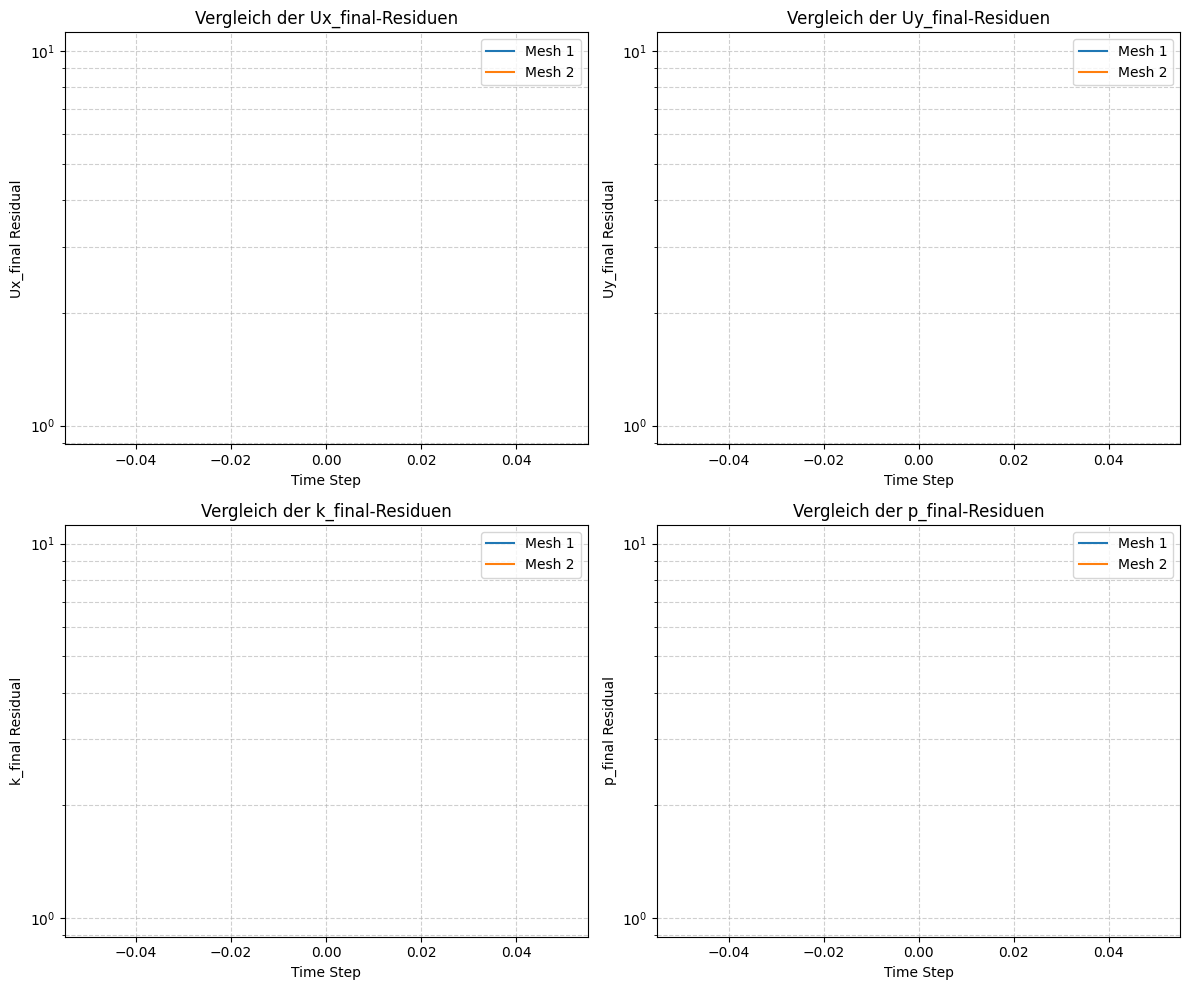

Times: []


In [2]:
import matplotlib.pyplot as plt

def parse_solver_info(filename):
    times = []
    ux_final = []
    uy_final = []
    k_final = []
    p_final = []

    with open(filename, 'r') as f:
        for line in f:
            next(f)
            next(f)
            # Überspringe Kommentare und leere Zeilen
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) < 5:
                continue

            try:
                time = float(parts[0])
                ux = float(parts[3])  # Ux_final
                uy = float(parts[5])  # Uy_final
                k = float(parts[9])   # k_final
                p = float(parts[15])  # p_final
                times.append(time)
                ux_final.append(ux)
                uy_final.append(uy)
                k_final.append(k)
                p_final.append(p)
            except ValueError:
                continue

    return times, ux_final, uy_final, k_final, p_final


# === Dateien einlesen ===
times1, ux1, uy1, k1, p1 = parse_solver_info('output/MeshConvergence/mesh_1/postProcessing/solverInfo/0/solverInfo.dat')
times2, ux2, uy2, k2, p2 = parse_solver_info('output/MeshConvergence/mesh_2/postProcessing/solverInfo/0/solverInfo.dat')

# Länge angleichen (an längeres Case)
if len(times1) > len(times2):
    times = times1
    ux2.extend([None] * (len(times1) - len(times2)))
    uy2.extend([None] * (len(times1) - len(times2)))
    k2.extend([None] * (len(times1) - len(times2)))
    p2.extend([None] * (len(times1) - len(times2)))
elif len(times2) > len(times1):
    times = times2
    ux1.extend([None] * (len(times2) - len(times1)))
    uy1.extend([None] * (len(times2) - len(times1)))
    k1.extend([None] * (len(times2) - len(times1)))
    p1.extend([None] * (len(times2) - len(times1)))
else:
    times = times1

# === Plot für Ux_final ===
plt.figure(figsize=(12, 10))

# Ux_final Plot
plt.subplot(2, 2, 1)
plt.plot(times, ux1, label='Mesh 1')
plt.plot(times, ux2, label='Mesh 2')
plt.xlabel('Time Step')
plt.ylabel('Ux_final Residual')
plt.title('Vergleich der Ux_final-Residuen')
plt.yscale('log')  # Falls logarithmisch sinnvoll
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

# === Plot für Uy_final ===
plt.subplot(2, 2, 2)
plt.plot(times, uy1, label='Mesh 1')
plt.plot(times, uy2, label='Mesh 2')
plt.xlabel('Time Step')
plt.ylabel('Uy_final Residual')
plt.title('Vergleich der Uy_final-Residuen')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

# === Plot für k_final ===
plt.subplot(2, 2, 3)
plt.plot(times, k1, label='Mesh 1')
plt.plot(times, k2, label='Mesh 2')
plt.xlabel('Time Step')
plt.ylabel('k_final Residual')
plt.title('Vergleich der k_final-Residuen')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

# === Plot für p_final ===
plt.subplot(2, 2, 4)
plt.plot(times, p1, label='Mesh 1')
plt.plot(times, p2, label='Mesh 2')
plt.xlabel('Time Step')
plt.ylabel('p_final Residual')
plt.title('Vergleich der p_final-Residuen')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

print("Times:", times1)


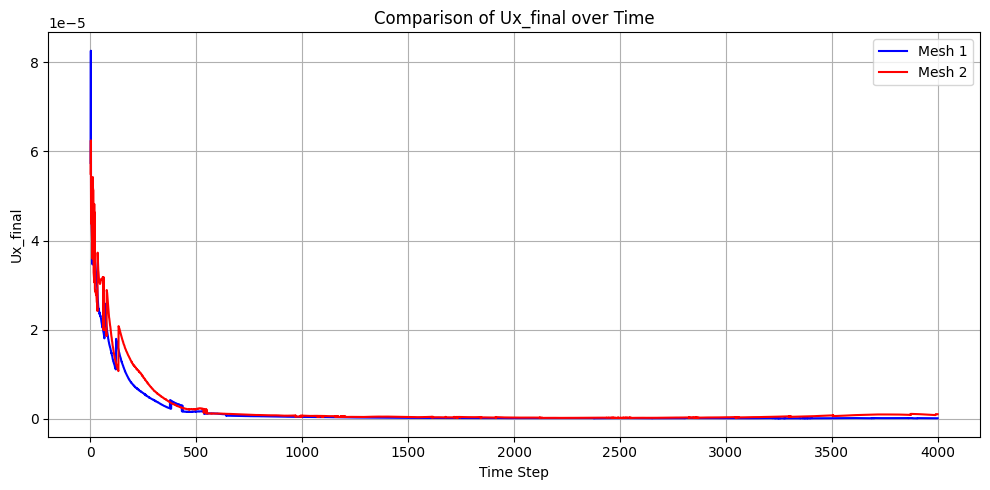

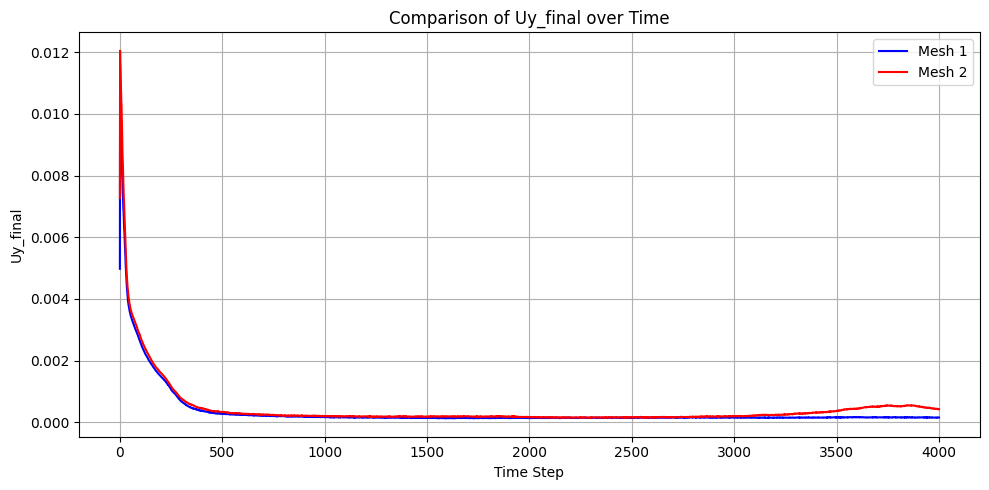

In [3]:
import matplotlib.pyplot as plt

def parse_solver_info(filename):
    """
    Diese Funktion liest die solverInfo.dat Datei und extrahiert die Zeit, Ux_final und Uy_final.
    """
    times = []
    ux_final = []
    uy_final = []

    try:
        with open(filename, 'r') as f:
            # Überspringe die ersten beiden Zeilen (Kommentar und Spaltenüberschrift)
            next(f)  # Überspringt die Kommentarzeile
            next(f)  # Überspringt die Spaltenüberschrift

            for line in f:
                # Überspringe leere Zeilen
                if not line.strip():
                    continue

                parts = line.strip().split()

                # Sicherstellen, dass die Zeile genügend Daten hat
                if len(parts) < 5:
                    continue

                try:
                    time = float(parts[0])  # Extrahiere die Zeit
                    ux = float(parts[3])    # Extrahiere Ux_final (4. Spalte)
                    uy = float(parts[5])    # Extrahiere Uy_final (6. Spalte)

                    times.append(time)
                    ux_final.append(ux)
                    uy_final.append(uy)
                except ValueError:
                    continue  # Wenn es einen Fehler gibt, überspringe diese Zeile

    except FileNotFoundError:
        print(f"Fehler: Die Datei {filename} wurde nicht gefunden.")
        return [], [], []

    return times, ux_final, uy_final

# Pfade zu den beiden Dateien
file_mesh_1 = 'output/MeshConvergence/mesh_1/postProcessing/solverInfo/0/solverInfo.dat'
file_mesh_2 = 'output/MeshConvergence/mesh_2/postProcessing/solverInfo/0/solverInfo.dat'

# Extrahiere die Daten für beide Meshes
times_1, ux_final_1, uy_final_1 = parse_solver_info(file_mesh_1)
times_2, ux_final_2, uy_final_2 = parse_solver_info(file_mesh_2)

# Erstelle Diagramm für Ux_final
plt.figure(figsize=(10, 5))
plt.plot(times_1, ux_final_1, label='Mesh 1', color='blue')
plt.plot(times_2, ux_final_2, label='Mesh 2', color='red')
plt.xlabel('Time Step')
plt.ylabel('Ux_final')
plt.title('Comparison of Ux_final over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Erstelle Diagramm für Uy_final
plt.figure(figsize=(10, 5))
plt.plot(times_1, uy_final_1, label='Mesh 1', color='blue')
plt.plot(times_2, uy_final_2, label='Mesh 2', color='red')
plt.xlabel('Time Step')
plt.ylabel('Uy_final')
plt.title('Comparison of Uy_final over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



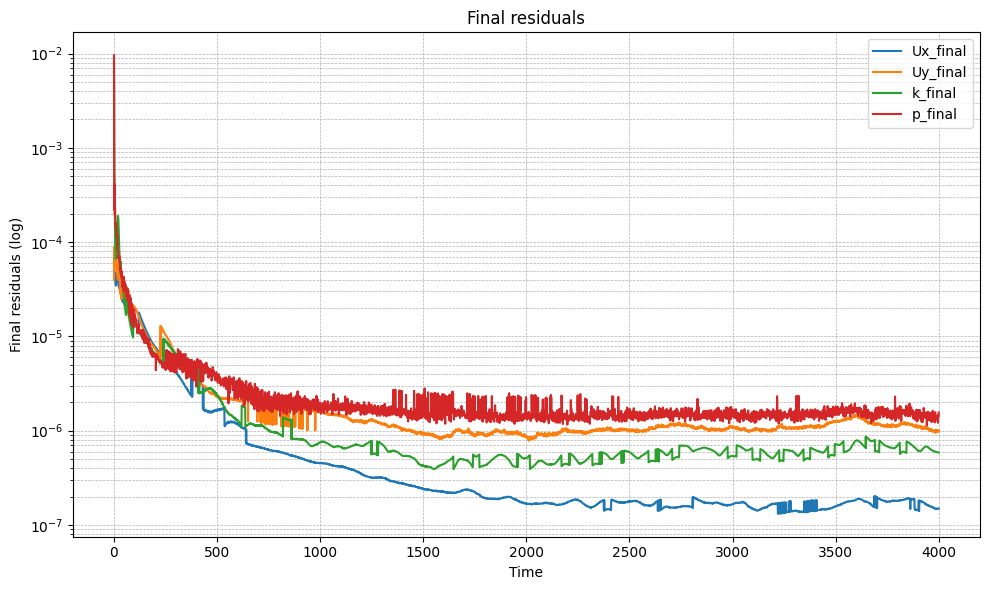

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# defining file of solverInfo 
mesh_1 = 'output/MeshConvergence/mesh_1/postProcessing/solverInfo/0/solverInfo.dat'
mesh_2 = 'output/MeshConvergence/mesh_2/postProcessing/solverInfo/0/solverInfo.dat'

# columns
colnames = [
    "Time", "U_solver", "Ux_initial", "Ux_final", "Ux_iters",
    "Uy_initial", "Uy_final", "Uy_iters", "U_converged",
    "k_solver", "k_initial", "k_final", "k_iters", "k_converged",
    "p_solver", "p_initial", "p_final", "p_iters", "p_converged"
]

# reading file
df1 = pd.read_csv(mesh_1, sep=r'\s+', skiprows=2, names=colnames)
df2 = pd.read_csv(mesh_2, sep=r'\s+', skiprows=2, names=colnames)

# plotting
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
plt.plot(df1["Time"], df1["Ux_final"], label="Ux_final")
plt.plot(df1["Time"], df1["Uy_final"], label="Uy_final")
plt.plot(df1["Time"], df1["k_final"], label="k_final")
plt.plot(df1["Time"], df1["p_final"], label="p_final")
 
plt.xlabel("Time")
plt.ylabel("Final residuals (log)")
plt.title("Final residuals Mesh 1")
plt.yscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(df1["Time"], df2["Ux_final"], label="Ux_final")
plt.plot(df1["Time"], df2["Uy_final"], label="Uy_final")
plt.plot(df1["Time"], df2["k_final"], label="k_final")
plt.plot(df1["Time"], df2["p_final"], label="p_final")
 
plt.xlabel("Time")
plt.ylabel("Final residuals (log)")
plt.title("Final residuals Mesh 1")
plt.yscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()

### Comparison of the residuals of each mesh plotted over time

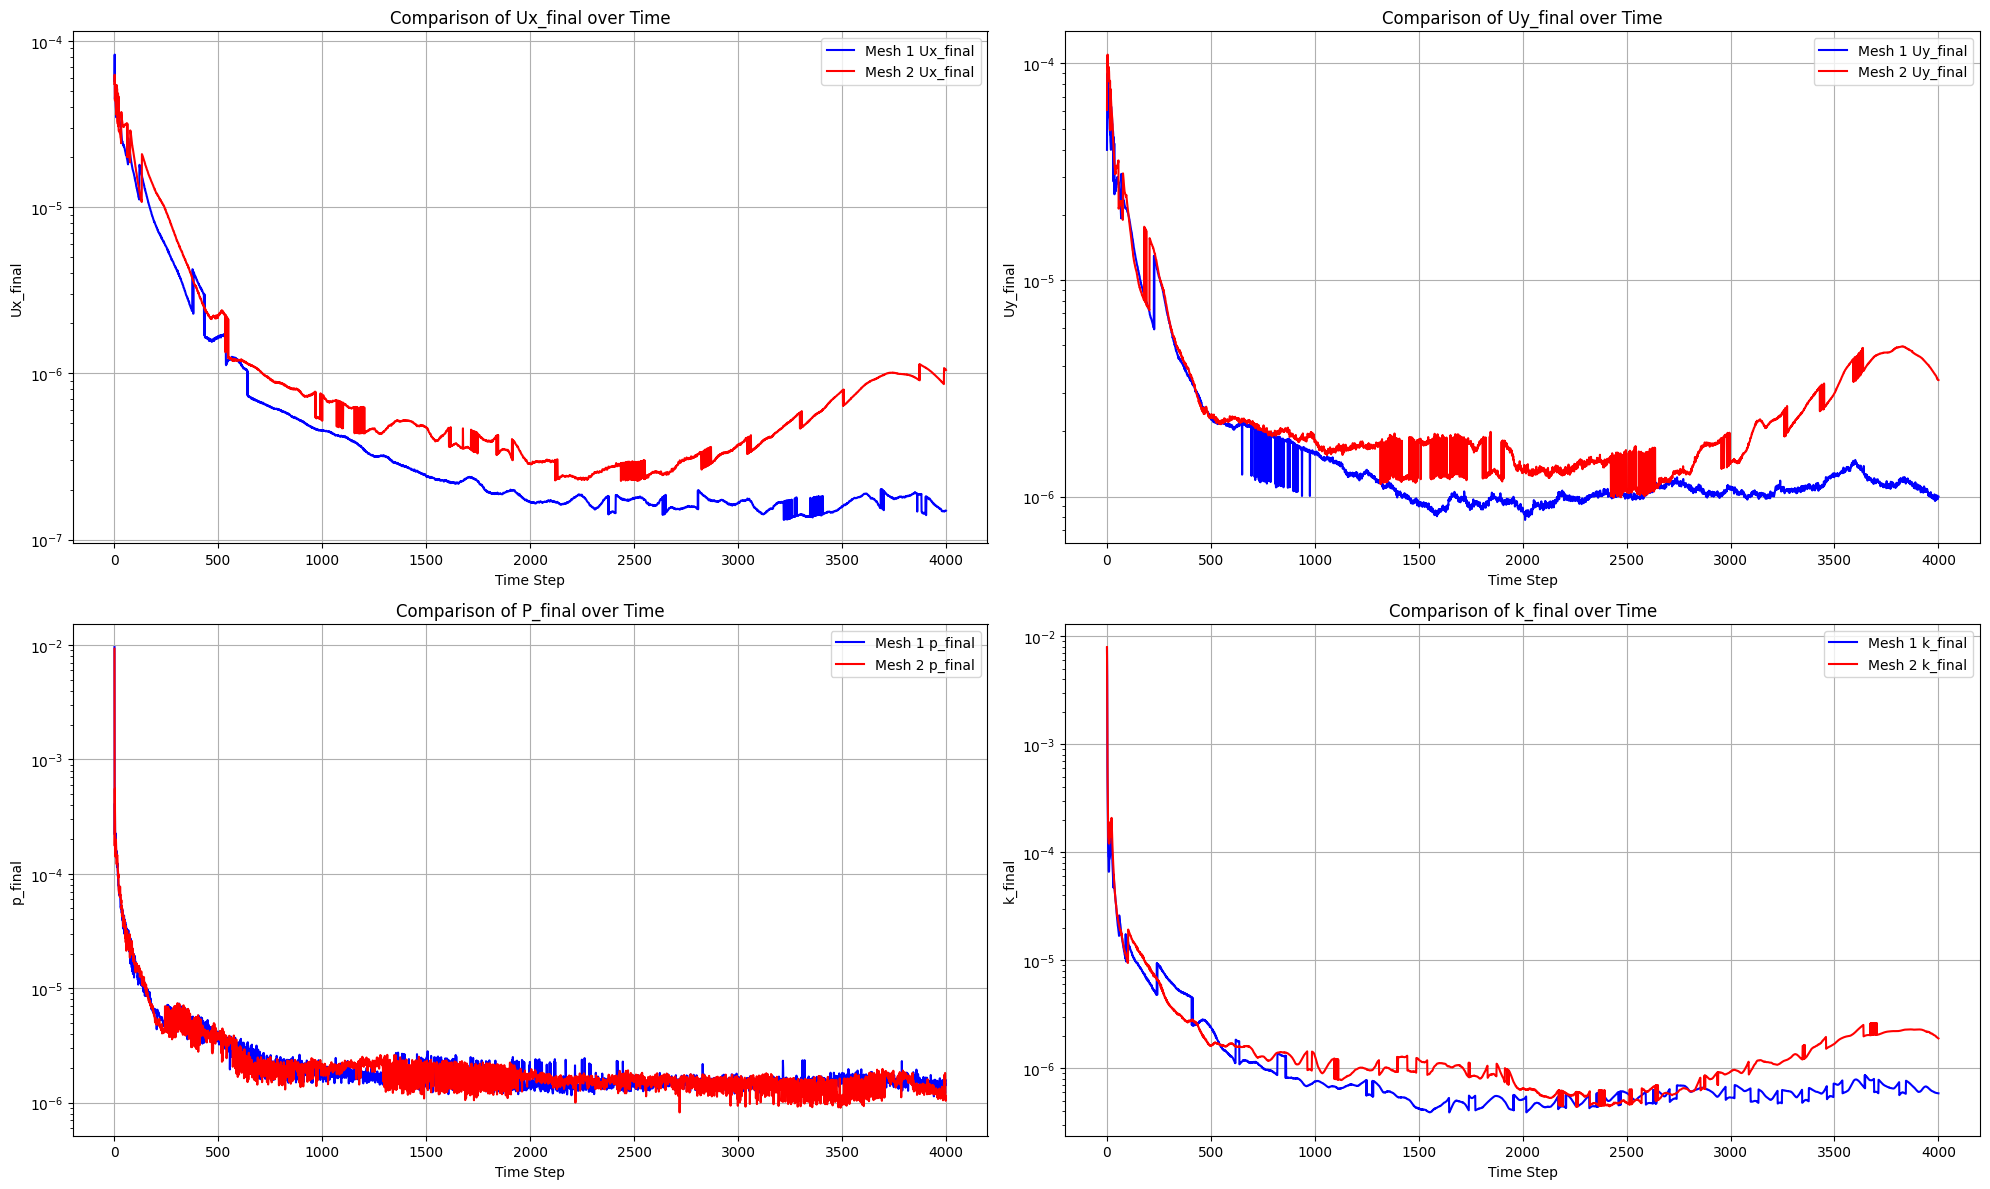

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
plt.plot(df1["Time"], df1["Ux_final"], label="Mesh 1 Ux_final", color='blue')
plt.plot(df2["Time"], df2["Ux_final"], label="Mesh 2 Ux_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('Ux_final')
plt.title('Comparison of Ux_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Erstelle Diagramm für Uy_final
plt.subplot(2, 2, 2)
plt.plot(df1["Time"], df1["Uy_final"], label="Mesh 1 Uy_final", color='blue')
plt.plot(df2["Time"], df2["Uy_final"], label="Mesh 2 Uy_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('Uy_final')
plt.title('Comparison of Uy_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(df1["Time"], df1["p_final"], label="Mesh 1 p_final", color='blue')
plt.plot(df2["Time"], df2["p_final"], label="Mesh 2 p_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('p_final')
plt.title('Comparison of P_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.plot(df1["Time"], df1["k_final"], label="Mesh 1 k_final", color='blue')
plt.plot(df2["Time"], df2["k_final"], label="Mesh 2 k_final", color='red')
plt.xlabel('Time Step')
plt.ylabel('k_final')
plt.title('Comparison of k_final over Time')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()
